# Fandango's rating


En 2015, un journaliste a étudié les notes que mettait le staff de Fandango et les a comparé à celle des utilisateurs. Il s'est rendu compte que les notes du site étaient surévaluées par rapport à celle des utilisateurs. C'était apparement un bug du site, et Fandango aurait fix le bug.

Nous allons donc chercher à savoir si la différence de notation est toujours visible, et donc si Fandango a bien modifié sa méthode de rating.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
fandango= pd.read_csv("fandango_score_comparison.csv")
movie_rating= pd.read_csv("movie_ratings_16_17.csv")

In [3]:
print(fandango.columns)
print(movie_rating.columns)

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')
Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')


In [4]:
print(fandango.head())
print(movie_rating.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

In [5]:
fandango_rating= fandango[['FILM', 'Fandango_Stars',
                           'Fandango_Ratingvalue',
                           'Fandango_votes',
                           'Fandango_Difference'
                          ]]
movie_rating= movie_rating[['movie', 'year', 'fandango']]


Population d'intérêt: le nbr r

movie_rating ne contient que les film qui possède un nombre significatif de rating

fandango contient les films qui ont au moins 30 reviews

donc notre sample n'est pas aléatoire car il va certainement contenir les films les plus populaires, et donc plus probablement les blockbusters

Soit on collecte de nouvelle données pour remédier au biai de sélection de notre sample, soit on change la problématique (on restreint l'analyse).
C'est beaucoup plus simple de modifier le but de notre analyse.

#### Nous allons donc travailler sur les notations des films les plus populaire (30 reviews mini).
L'objectif sera donc d'évaluer un potentiel biai de notation sur les films les plus populaires. 
Dans notre cas, nous allons essayer de constater des différence entre les notations de Fandango entre 2015 et 2016 (c'est à dire avant et après qu'ils aient "changé" leurs modèle de rating)

In [6]:
fandango_pop= fandango_rating[fandango_rating.Fandango_votes >= 30]
fandango_pop.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
fandango_pop["year"]= fandango_pop["FILM"].str.split().str[-1]
fandango_pop["FILM"]= fandango_pop["FILM"].str.split().str[:-1].str.join(',').str.replace(',',' ')   
def year_parenth(element):
    element= element.replace('(','').replace(')','')
    return int(element)
fandango_pop["year"]= fandango_pop["year"].apply(year_parenth)

fandango_pop.head()
# on a donc récupérer l'année de sortie du film
# et on a affecté cette valeur dans un colonne year

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015


In [8]:
fandango_2015= fandango_pop.loc[fandango_pop.loc[:, "year"] == 2015,:]
fandango_2016= movie_rating.loc[movie_rating.loc[:, "year"] == 2016,:]



In [9]:
fandango_2015.sample(30, random_state= 1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
138,Spare Parts,4.5,4.5,450,0.0,2015
120,The Wolfpack,3.5,3.4,66,0.1,2015
63,Child 44,4.0,3.7,308,0.3,2015
64,Dark Places,4.0,3.7,55,0.3,2015
40,I'll See You In My Dreams,4.0,3.6,281,0.4,2015
135,The Lazarus Effect,3.0,3.0,1651,0.0,2015
139,Serena,3.0,3.0,50,0.0,2015
42,About Elly,4.0,3.6,43,0.4,2015
38,Saint Laurent,3.5,3.1,43,0.4,2015
59,Mortdecai,3.5,3.2,1196,0.3,2015


In [10]:
fandango_2016.sample(10, random_state= 1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


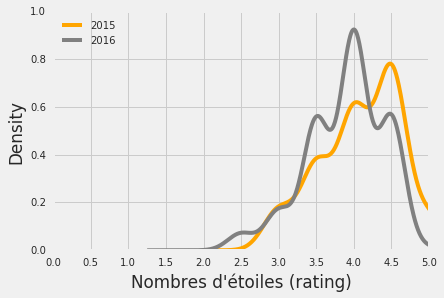

In [58]:
figure= plt.figure()
plt.style.use('fivethirtyeight')
fandango_2015["Fandango_Stars"].plot.kde(label= "2015",
                                        legend= True,
                                         color= 'orange'
                                       )

fandango_2016["fandango"].plot.kde(label= "2016",
                                        legend= True,
                                   color= 'grey'
                                       )
plt.xlim(0,5)
plt.legend(loc= "upper left")
plt.xlabel("Nombres d'étoiles (rating)")
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

La distribution pour l'année 2016 tend moins vers la gauche que celle de 2015 : peut-être ont-ils changer leurs méthodes; néanmoins il faudrait encore comparer le rating de 2016 par rapport au rating des users pour 2016, c'est à dire refaire la même comparaison que celle faite pour l'année 2015.

Les distributions sont différentes:
Le pic de distribution est plus à gauche pour 2016 à 4, avec 2 sub-pics pour 3.5 et 4.5. Alors que pour l'année 2015, le max est à 4. (petite pic sur 4)

Avec les tableaux en dessous:
On a la même la médiane mais notre dernier quartile est plus faible pour 2016, tout comme la moyenne. On observe bien un différence, on a bien un changement dans la notation de Fandango.

In [12]:
print(fandango_2016["fandango"].describe())
fandango_2015["Fandango_Stars"].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64


count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [19]:
col= ["2015", "2016"]

stat= pd.DataFrame(columns= col)

mean_2015= fandango_2015["Fandango_Stars"].mean()
mean_2016= fandango_2016["fandango"].mean()

mode_2015= fandango_2015["Fandango_Stars"].mode()[0]
mode_2016= fandango_2016["fandango"].mode()[0]

median_2015= fandango_2015["Fandango_Stars"].median()
median_2016= fandango_2016["fandango"].median()

stat["2016"]= [mean_2016, median_2016, mode_2016]
stat["2015"]= [mean_2015, median_2015, mode_2015]
stat.index= ["mean", "median", "mode"]
stat

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


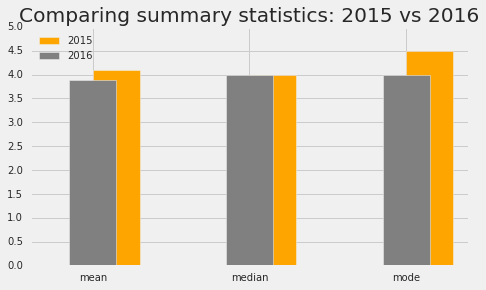

In [56]:
stat["2015"].plot.bar(rot= 0,
                      align= "edge",
                      label= "2015",
                      color= 'orange',
                      legend= True,
                      width= 0.30,
                      figsize= (7,4))
stat["2016"].plot.bar(rot= 0,
                      color= "grey",
                      label= "2016",
                      legend= True,
                      width= 0.30)

plt.legend(loc="upper left")
plt.ylim(0,5)
plt.yticks(np.arange(0,5.5,0.5))
plt.title("Comparing summary statistics: 2015 vs 2016")

Cette analyse n'est pas suffisante pour conclure sur le fait que la méthode a effectivement changé car beaucoup de variable peuvent affecter le résultat (les films 2015 ne sont pas les même que ceux de 2016; on a pas fait le même test pour 2016...)

Mais si on part du principe que l'on a contrôle pour toutes les variables, et que l'on a ces résultats, on pourrait dire qu'il y a bien une différence de notation entre les 2 années.